# load data

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from tqdm.notebook import tqdm

In [2]:
articles = pd.read_csv("data/articles.csv")
customers = pd.read_csv("data/customers.csv")
transactions = pd.read_csv("data/transactions_train.csv")

In [66]:
transactions.groupby(['customer_id','article_id'])['t_dat'].agg('count').reset_index()

,customer_id,article_id,t_dat
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,176209023,1
1,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,568601006,2
2,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,568601043,1
3,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,607642008,1
4,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,625548001,1
...,...,...,...
27306434,ffffd7744cebcf3aca44ae7049d2a94b87074c3d4ffe38...,821395003,1
27306435,ffffd7744cebcf3aca44ae7049d2a94b87074c3d4ffe38...,840360003,1
27306436,ffffd7744cebcf3aca44ae7049d2a94b87074c3d4ffe38...,866755002,2
27306437,ffffd7744cebcf3aca44ae7049d2a94b87074c3d4ffe38...,882810001,1


In [64]:
transactions

,t_dat,customer_id,article_id,price,sales_channel_id
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.0508,2
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.0305,2
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004,0.0152,2
3,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687003,0.0169,2
4,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687004,0.0169,2
...,...,...,...,...,...
31788319,2020-09-22,fff2282977442e327b45d8c89afde25617d00124d0f999...,929511001,0.0593,2
31788320,2020-09-22,fff2282977442e327b45d8c89afde25617d00124d0f999...,891322004,0.0424,2
31788321,2020-09-22,fff380805474b287b05cb2a7507b9a013482f7dd0bce0e...,918325001,0.0432,1
31788322,2020-09-22,fff4d3a8b1f3b60af93e78c30a7cb4cf75edaf2590d3e5...,833459002,0.0068,1


In [62]:
print(tmp.agg('count'))

customer_id                                                       article_id
00000dbacae5abe5e23885899a1fa44253a17956c6d1c3d25f88aa139fdfc657  176209023     1
                                                                  568601006     2
                                                                  568601043     1
                                                                  607642008     1
                                                                  625548001     1
                                                                               ..
ffffd7744cebcf3aca44ae7049d2a94b87074c3d4ffe38b2236865d949d4df6a  821395003     1
                                                                  840360003     1
                                                                  866755002     2
                                                                  882810001     1
ffffd9ac14e89946416d80e791d064701994755c3ab686a1eaf3458c36f52241  806050001     1
Name: t_dat, Length: 

# Article

* article_id : A unique identifier of every article.
* product_code, prod_name : A unique identifier of every product and its name (not the same).
* product_type, product_type_name : The group of product_code and its name
* graphical_appearance_no, graphical_appearance_name : The group of graphics and its name
* colour_group_code, colour_group_name : The group of color and its name
* perceived_colour_value_id, perceived_colour_value_name, perceived_colour_master_id, perceived_colour_master_name : The * added color info
* department_no, department_name: : A unique identifier of every dep and its name
* index_code, index_name: : A unique identifier of every index and its name
* index_group_no, index_group_name: : A group of indeces and its name
* section_no, section_name: : A unique identifier of every section and its name
* garment_group_no, garment_group_name: : A unique identifier of every garment and its name
* detail_desc: : Details

In [3]:
for col in articles.columns:
    un_n = articles[col].nunique()
    print(f'unique {col}: {un_n}')

unique article_id: 105542
unique product_code: 47224
unique prod_name: 45875
unique product_type_no: 132
unique product_type_name: 131
unique product_group_name: 19
unique graphical_appearance_no: 30
unique graphical_appearance_name: 30
unique colour_group_code: 50
unique colour_group_name: 50
unique perceived_colour_value_id: 8
unique perceived_colour_value_name: 8
unique perceived_colour_master_id: 20
unique perceived_colour_master_name: 20
unique department_no: 299
unique department_name: 250
unique index_code: 10
unique index_name: 10
unique index_group_no: 5
unique index_group_name: 5
unique section_no: 57
unique section_name: 56
unique garment_group_no: 21
unique garment_group_name: 21
unique detail_desc: 43404


In [4]:
articles.head()

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,108775015,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,9,Black,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
1,108775044,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,10,White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
2,108775051,108775,Strap top (1),253,Vest top,Garment Upper body,1010017,Stripe,11,Off White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
3,110065001,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,9,Black,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."
4,110065002,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,10,White,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."


## index name毎のカウント

* ladysのウェアが多い。

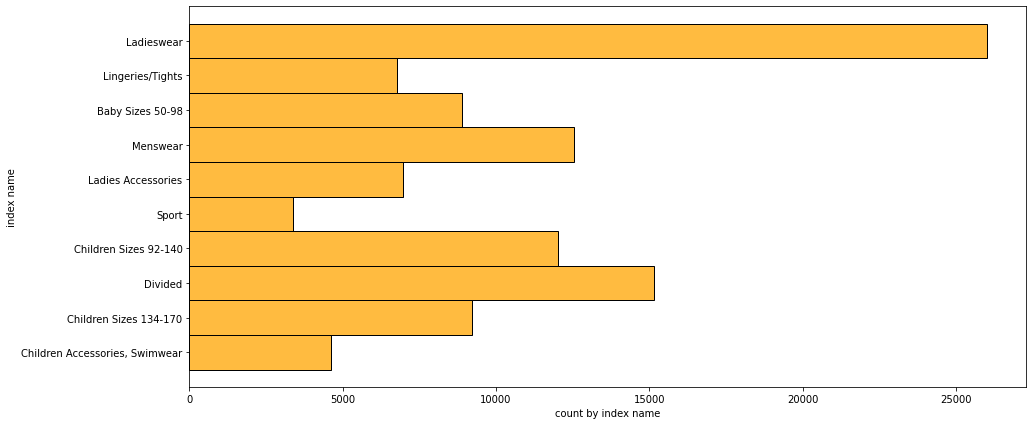

In [5]:
f, ax = plt.subplots(figsize=(15, 7))
ax = sns.histplot(data=articles, y='index_name', color='orange')
ax.set_xlabel('count by index name')
ax.set_ylabel('index name')
plt.show()

In [ ]:
plot_bar(articles, 'product_group_name', pct=True)

### subグループ

In [6]:
pd.DataFrame(articles.groupby(['index_group_name', 'index_name']).count()['article_id'])

article_id
index_group_name index_name                                
Baby/Children    Baby Sizes 50-98                      8875
                 Children Accessories, Swimwear        4615
                 Children Sizes 134-170                9214
                 Children Sizes 92-140                12007
Divided          Divided                              15149
Ladieswear       Ladies Accessories                    6961
                 Ladieswear                           26001
                 Lingeries/Tights                      6775
Menswear         Menswear                             12553
Sport            Sport                                 3392

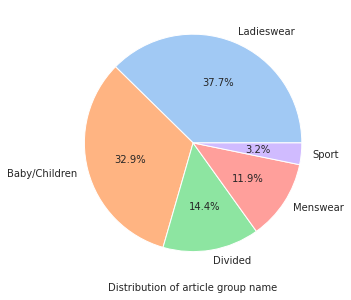

In [7]:
pie_data = articles[['article_id', 'index_group_name']].groupby('index_group_name').count().sort_values(by='article_id', ascending=False)

sns.set_style("darkgrid")
f, ax = plt.subplots(figsize=(10,5))
colors = sns.color_palette('pastel')
ax.pie(pie_data.article_id, labels=pie_data.index, colors = colors, autopct='%1.1f%%')
ax.set_facecolor('lightgrey')
ax.set_xlabel('Distribution of article group name')
plt.show()

## garmentグループごとのカウント

* jersey Fancyというブランドが多い。

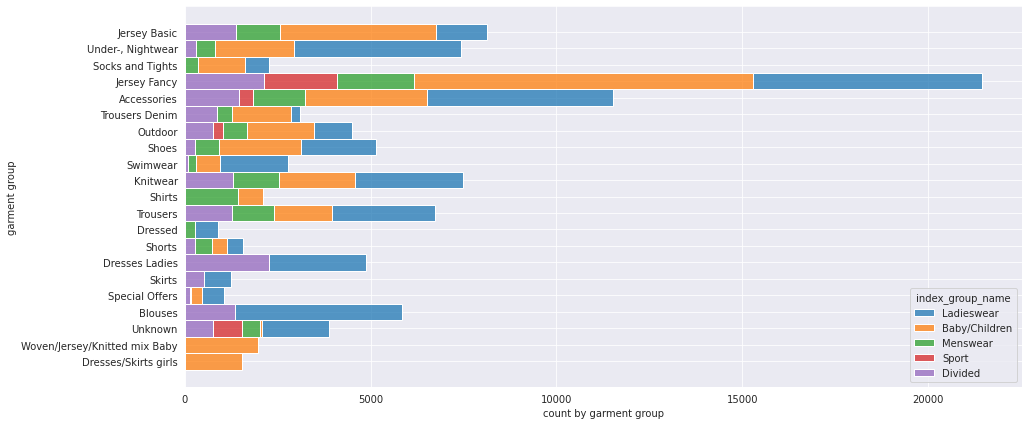

In [8]:
f, ax = plt.subplots(figsize=(15, 7))
ax = sns.histplot(data=articles, y='garment_group_name', color='orange', hue='index_group_name', multiple="stack")
ax.set_xlabel('count by garment group')
ax.set_ylabel('garment group')
plt.show()

### product詳細分類

In [9]:
pd.options.display.max_rows = None
pd.DataFrame(articles.groupby(['product_group_name', 'product_type_name']).count()['article_id'])

article_id
product_group_name    product_type_name                   
Accessories           Accessories set                    7
                      Alice band                         6
                      Baby Bib                           3
                      Bag                             1280
                      Beanie                            56
                      Belt                             458
                      Bracelet                         180
                      Braces                             3
                      Bucket hat                         7
                      Cap                               13
                      Cap/peaked                       573
                      Dog Wear                          20
                      Earring                         1159
                      Earrings                          11
                      Eyeglasses                         2
                      Felt hat                          10
                      Giftbox                           15
                      Gloves                           367
                      Hair clip                        244
                      Hair string                      238
                      Hair ties                         24
                      Hair/alice band                  854
                      Hairband                           2
                      Hat/beanie                      1349
                      Hat/brim                         396
                      Headband                           1
                      Necklace                         581
                      Other accessories               1034
                      Ring                             240
                      Scarf                           1013
                      Soft Toys                         46
                      Straw hat                          6
                      Sunglasses                       621
                      Tie                              141
                      Umbrella                          26
                      Wallet                            77
                      Watch                             73
                      Waterbottle                       22
Bags                  Backpack                           6
                      Bumbag                             1
                      Cross-body bag                     5
                      Shoulder bag                       2
                      Tote bag                           2
                      Weekend/Gym bag                    9
Cosmetic              Chem. cosmetics                    3
                      Fine cosmetics                    46
Fun                   Toy                                2
Furniture             Side table                        13
Garment Full body     Costumes                          90
                      Dress                          10362
                      Dungarees                        309
                      Garment Set                     1320
                      Jumpsuit/Playsuit               1147
                      Outdoor overall                   64
Garment Lower body    Leggings/Tights                 1878
                      Outdoor trousers                 130
                      Shorts                          3939
                      Skirt                           2696
                      Trousers                       11169
Garment Upper body    Blazer                          1110
                      Blouse                          3979
                      Bodysuit                         913
                      Cardigan                        1550
                      Coat                             460
                      Hoodie                          2356
                      Jacket                          3940
                      Outdoor Waistc

## Colour

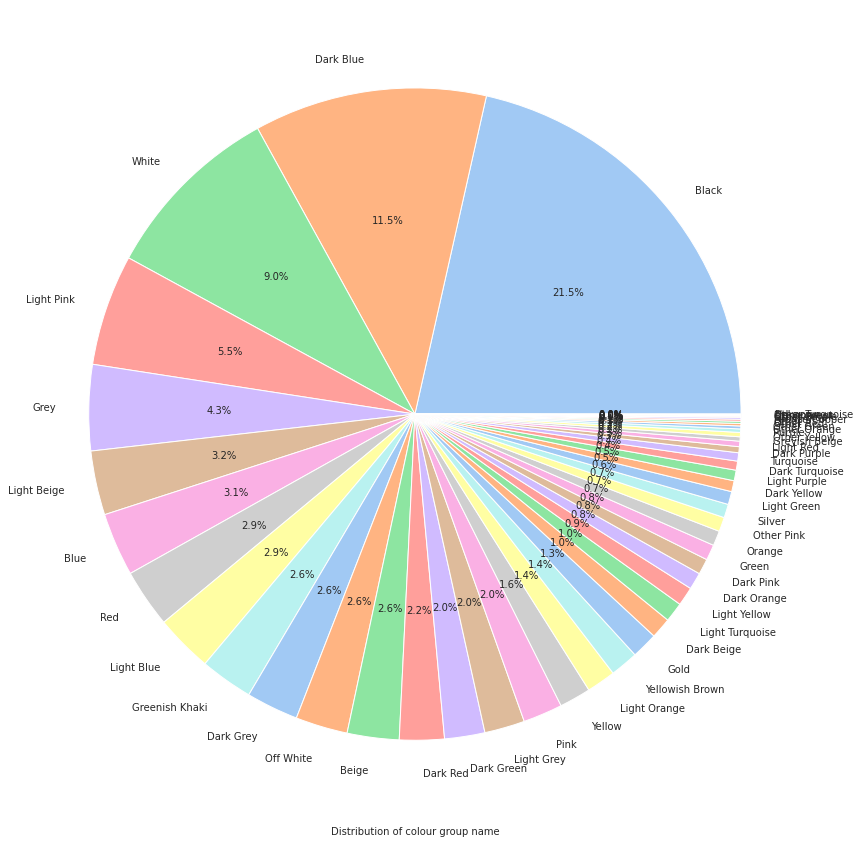

In [10]:
pie_data = articles[['article_id', 'colour_group_name']].groupby('colour_group_name').count().sort_values(by='article_id', ascending=False)

sns.set_style("darkgrid")
f, ax = plt.subplots(figsize=(20,15))
# ax = sns.histplot(data=customers, x='fashion_news_frequency', color='orange')
# ax = sns.pie(data=customers, x='fashion_news_frequency', color='orange')
colors = sns.color_palette('pastel')
ax.pie(pie_data.article_id, labels=pie_data.index, colors = colors, autopct='%1.1f%%')
ax.set_facecolor('lightgrey')
ax.set_xlabel('Distribution of colour group name')
plt.show()

# Customers

Customers data description:

* customer_id : A unique identifier of every customer
* FN : 1 or missed ??
* Active : 1 or missed ??
* club_member_status : Status in club
* fashion_news_frequency : How often H&M may send news to customer
* age : The current age
* postal_code : Postal code of customer

In [11]:
pd.options.display.max_rows = 50
customers.head()

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,NaN,NaN,ACTIVE,NONE,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,NaN,NaN,ACTIVE,NONE,25.0,2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,NaN,NaN,ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,NaN,NaN,ACTIVE,NONE,54.0,5d36574f52495e81f019b680c843c443bd343d5ca5b1c2...
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,1.0,1.0,ACTIVE,Regularly,52.0,25fa5ddee9aac01b35208d01736e57942317d756b32ddd...


In [12]:
customers.shape[0] - customers['customer_id'].nunique()

0

## Outlier in customer_id

In [13]:
data_postal = customers.groupby('postal_code', as_index=False).count().sort_values('customer_id', ascending=False)
data_postal.head()

,postal_code,customer_id,FN,Active,club_member_status,fashion_news_frequency,age
61034,2c29ae653a9282cce4151bd87643c907644e09541abc28...,120303,42874,39886,118281,114377,118002
281937,cc4ed85e30f4977dae47662ddc468cd2eec11472de6fac...,261,109,104,261,261,260
156090,714976379549eb90aae4a71bca6c7402cc646ae7c40f6c...,159,90,88,159,159,158
171208,7c1fa3b0ec1d37ce2c3f34f63bd792f3b4494f324b6be5...,157,55,54,157,156,156
126228,5b7eb31eabebd3277de632b82267286d847fd5d44287ee...,156,42,41,156,156,155


Ages, club_member_status are different, like customer_ids.

In [14]:
customers[customers['postal_code']=='2c29ae653a9282cce4151bd87643c907644e09541abc28ae87dea0d1f6603b1c'].head(5)

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
5,000064249685c11552da43ef22a5030f35a147f723d5b0...,NaN,NaN,NaN,NaN,NaN,2c29ae653a9282cce4151bd87643c907644e09541abc28...
8,00007e8d4e54114b5b2a9b51586325a8d0fa74ea23ef77...,NaN,NaN,ACTIVE,NONE,20.0,2c29ae653a9282cce4151bd87643c907644e09541abc28...
9,00008469a21b50b3d147c97135e25b4201a8c58997f787...,NaN,NaN,ACTIVE,NONE,20.0,2c29ae653a9282cce4151bd87643c907644e09541abc28...
11,000097d91384a0c14893c09ed047a963c4fc6a5c021044...,NaN,NaN,ACTIVE,NONE,31.0,2c29ae653a9282cce4151bd87643c907644e09541abc28...
14,0000ae1bbb25e04bdc7e35f718e852adfb3fbb72ef38b3...,1.0,1.0,ACTIVE,Regularly,29.0,2c29ae653a9282cce4151bd87643c907644e09541abc28...


## Age

若年層と中年層の2峰。若者と中年層では、購入品の分布が違いそう。cold startのユーザにお勧めする商品を選ぶ際、年代の情報も効きそう。

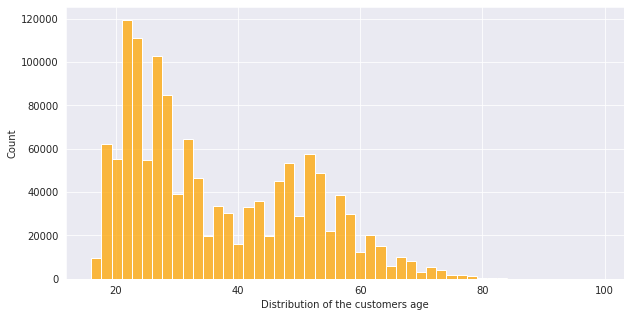

In [15]:
import seaborn as sns
from matplotlib import pyplot as plt
sns.set_style("darkgrid")
f, ax = plt.subplots(figsize=(10,5))
ax = sns.histplot(data=customers, x='age', bins=50, color='orange')
ax.set_xlabel('Distribution of the customers age')
plt.show()

Status in H&M club. Almost every customer has an active club status, some of them begin to activate it (pre-create). A tiny part of customers abandoned the club.

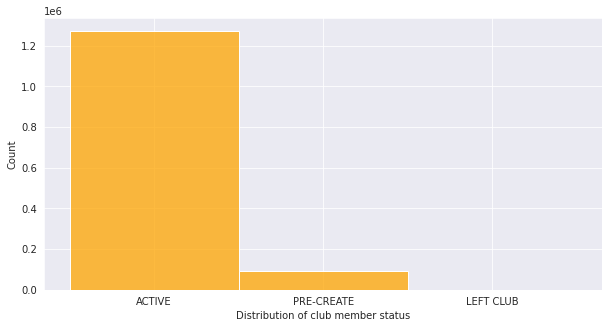

In [16]:
sns.set_style("darkgrid")
f, ax = plt.subplots(figsize=(10,5))
ax = sns.histplot(data=customers, x='club_member_status', color='orange')
ax.set_xlabel('Distribution of club member status')
plt.show()

Here we have three types for NO DATA. Let's unite these values.

In [17]:
customers['fashion_news_frequency'].unique()

array(['NONE', 'Regularly', nan, 'Monthly', 'None'], dtype=object)

In [18]:
customers.loc[~customers['fashion_news_frequency'].isin(['Regularly', 'Monthly']), 'fashion_news_frequency'] = 'None'
customers['fashion_news_frequency'].unique()

array(['None', 'Regularly', 'Monthly'], dtype=object)

## club_member_status

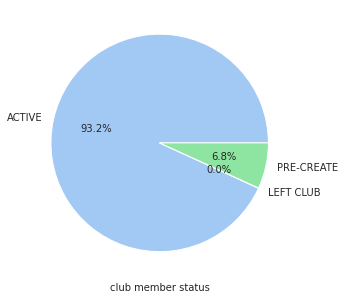

In [19]:
pie_data = customers[['customer_id', 'club_member_status']].groupby('club_member_status').count()

sns.set_style("darkgrid")
f, ax = plt.subplots(figsize=(10,5))
colors = sns.color_palette('pastel')
ax.pie(pie_data.customer_id, labels=pie_data.index, colors = colors, autopct='%1.1f%%')
ax.set_facecolor('lightgrey')
ax.set_xlabel('club member status')
plt.show()

## News letter

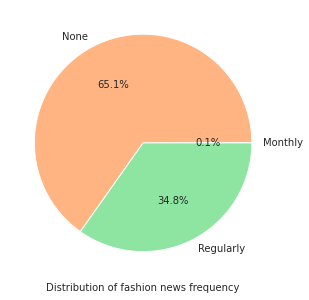

In [20]:
pie_data = customers[['customer_id', 'fashion_news_frequency']].groupby('fashion_news_frequency').count()

sns.set_style("darkgrid")
f, ax = plt.subplots(figsize=(10,5))
# ax = sns.histplot(data=customers, x='fashion_news_frequency', color='orange')
# ax = sns.pie(data=customers, x='fashion_news_frequency', color='orange')
colors = sns.color_palette('pastel')
ax.pie(pie_data.customer_id, labels=pie_data.index, colors = colors, autopct='%1.1f%%')
ax.set_facecolor('lightgrey')
ax.set_xlabel('Distribution of fashion news frequency')
plt.show()

# Transactions

Transactions data description:

* t_dat : A unique identifier of every customer
* customer_id : A unique identifier of every customer (in customers table)
* article_id : A unique identifier of every article (in articles table)
* price : Price of purchase
* sales_channel_id : 1 or 2

In [21]:
transactions.head()

,t_dat,customer_id,article_id,price,sales_channel_id
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.030492,2
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004,0.015237,2
3,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687003,0.016932,2
4,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687004,0.016932,2


Here we see outliers for price.

In [22]:
pd.set_option('display.float_format', '{:.4f}'.format)
pd.DataFrame(transactions.describe()['price'])

,price
count,31788324.0000
mean,0.0278
std,0.0192
min,0.0000
25%,0.0158
50%,0.0254
75%,0.0339
max,0.5915


In [23]:
transactions.head()

,t_dat,customer_id,article_id,price,sales_channel_id
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.0508,2
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.0305,2
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004,0.0152,2
3,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687003,0.0169,2
4,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687004,0.0169,2


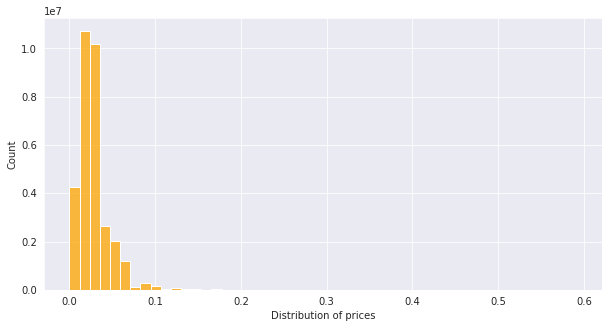

In [24]:
import seaborn as sns
from matplotlib import pyplot as plt
sns.set_style("darkgrid")
f, ax = plt.subplots(figsize=(10,5))
ax = sns.histplot(data=transactions.sort_values(by='price'), x='price', bins=50, color='orange')
ax.set_xlabel('Distribution of prices')
plt.show()

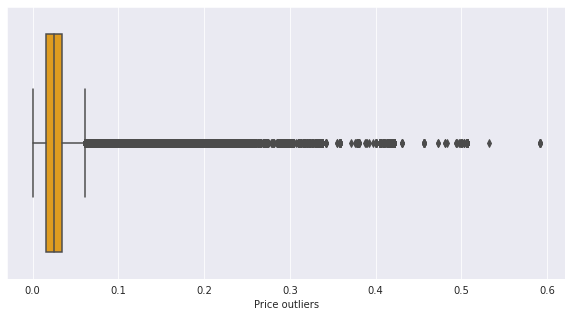

In [25]:
sns.set_style("darkgrid")
f, ax = plt.subplots(figsize=(10,5))
ax = sns.boxplot(data=transactions, x='price', color='orange')
ax.set_xlabel('Price outliers')
plt.show()

Top 10 customers by num of transactions.

In [26]:
transactions_byid = transactions.groupby('customer_id').count()

In [27]:
pd.DataFrame(transactions_byid.sort_values(by='price', ascending=False)['price'][:10])

,price
customer_id,
be1981ab818cf4ef6765b2ecaea7a2cbf14ccd6e8a7ee985513d9e8e53c6d91b,1895
b4db5e5259234574edfff958e170fe3a5e13b6f146752ca066abca3c156acc71,1441
49beaacac0c7801c2ce2d189efe525fe80b5d37e46ed05b50a4cd88e34d0748f,1364
a65f77281a528bf5c1e9f270141d601d116e1df33bf9df512f495ee06647a9cc,1361
cd04ec2726dd58a8c753e0d6423e57716fd9ebcf2f14ed6012e7e5bea016b4d6,1237
55d15396193dfd45836af3a6269a079efea339e875eff42cc0c228b002548a9d,1208
c140410d72a41ee5e2e3ba3d7f5a860f337f1b5e41c27cf9bda5517c8774f8fa,1170
8df45859ccd71ef1e48e2ee9d1c65d5728c31c46ae957d659fa4e5c3af6cc076,1169
03d0011487606c37c1b1ed147fc72f285a50c05f00b9712e0fc3da400c864296,1157


However, comparing prices inside groups is more accurate, because accessories and trousers prices may vary largerly.\
Get subset from articles and merge it to transactions.

In [28]:
articles_for_merge = articles[['article_id', 'prod_name', 'product_type_name', 'product_group_name', 'index_name']]
articles_for_merge = transactions[['customer_id', 'article_id', 'price', 't_dat']].merge(articles_for_merge, on='article_id', how='left')

In [29]:
articles.keys()

Index(['article_id', 'product_code', 'prod_name', 'product_type_no',
       'product_type_name', 'product_group_name', 'graphical_appearance_no',
       'graphical_appearance_name', 'colour_group_code', 'colour_group_name',
       'perceived_colour_value_id', 'perceived_colour_value_name',
       'perceived_colour_master_id', 'perceived_colour_master_name',
       'department_no', 'department_name', 'index_code', 'index_name',
       'index_group_no', 'index_group_name', 'section_no', 'section_name',
       'garment_group_no', 'garment_group_name', 'detail_desc'],
      dtype='object')

In [30]:
transactions.keys()

Index(['t_dat', 'customer_id', 'article_id', 'price', 'sales_channel_id'], dtype='object')

In [31]:
articles_for_merge

,customer_id,article_id,price,t_dat,prod_name,product_type_name,product_group_name,index_name
0,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.0508,2018-09-20,Atlanta Push Body Harlow,Underwear body,Underwear,Lingeries/Tights
1,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.0305,2018-09-20,Rae Push (Melbourne) 2p,Bra,Underwear,Lingeries/Tights
2,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004,0.0152,2018-09-20,Inca Jumper,Sweater,Garment Upper body,Divided
3,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687003,0.0169,2018-09-20,W YODA KNIT OL OFFER,Sweater,Garment Upper body,Ladieswear
4,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687004,0.0169,2018-09-20,W YODA KNIT OL OFFER,Sweater,Garment Upper body,Ladieswear
...,...,...,...,...,...,...,...,...
31788319,fff2282977442e327b45d8c89afde25617d00124d0f999...,929511001,0.0593,2020-09-22,POPPY PU SHIRT DRESS,Dress,Garment Full body,Divided
31788320,fff2282977442e327b45d8c89afde25617d00124d0f999...,891322004,0.0424,2020-09-22,FENNEL SHIRT DRESS,Unknown,Unknown,Divided
31788321,fff380805474b287b05cb2a7507b9a013482f7dd0bce0e...,918325001,0.0432,2020-09-22,Winter shopper,Bag,Accessories,Ladies Accessories
31788322,fff4d3a8b1f3b60af93e78c30a7cb4cf75edaf2590d3e5...,833459002,0.0068,2020-09-22,Class Aligator Ring Pack,Ring,Accessories,Ladies Accessories


## boxplot prices

Here we see outliers for group name prices. Lower/Upper/Full body have a huge price variance. I guess it could be like some unique collections, relative to casual ones. Some high price articles even belong to accessories group.

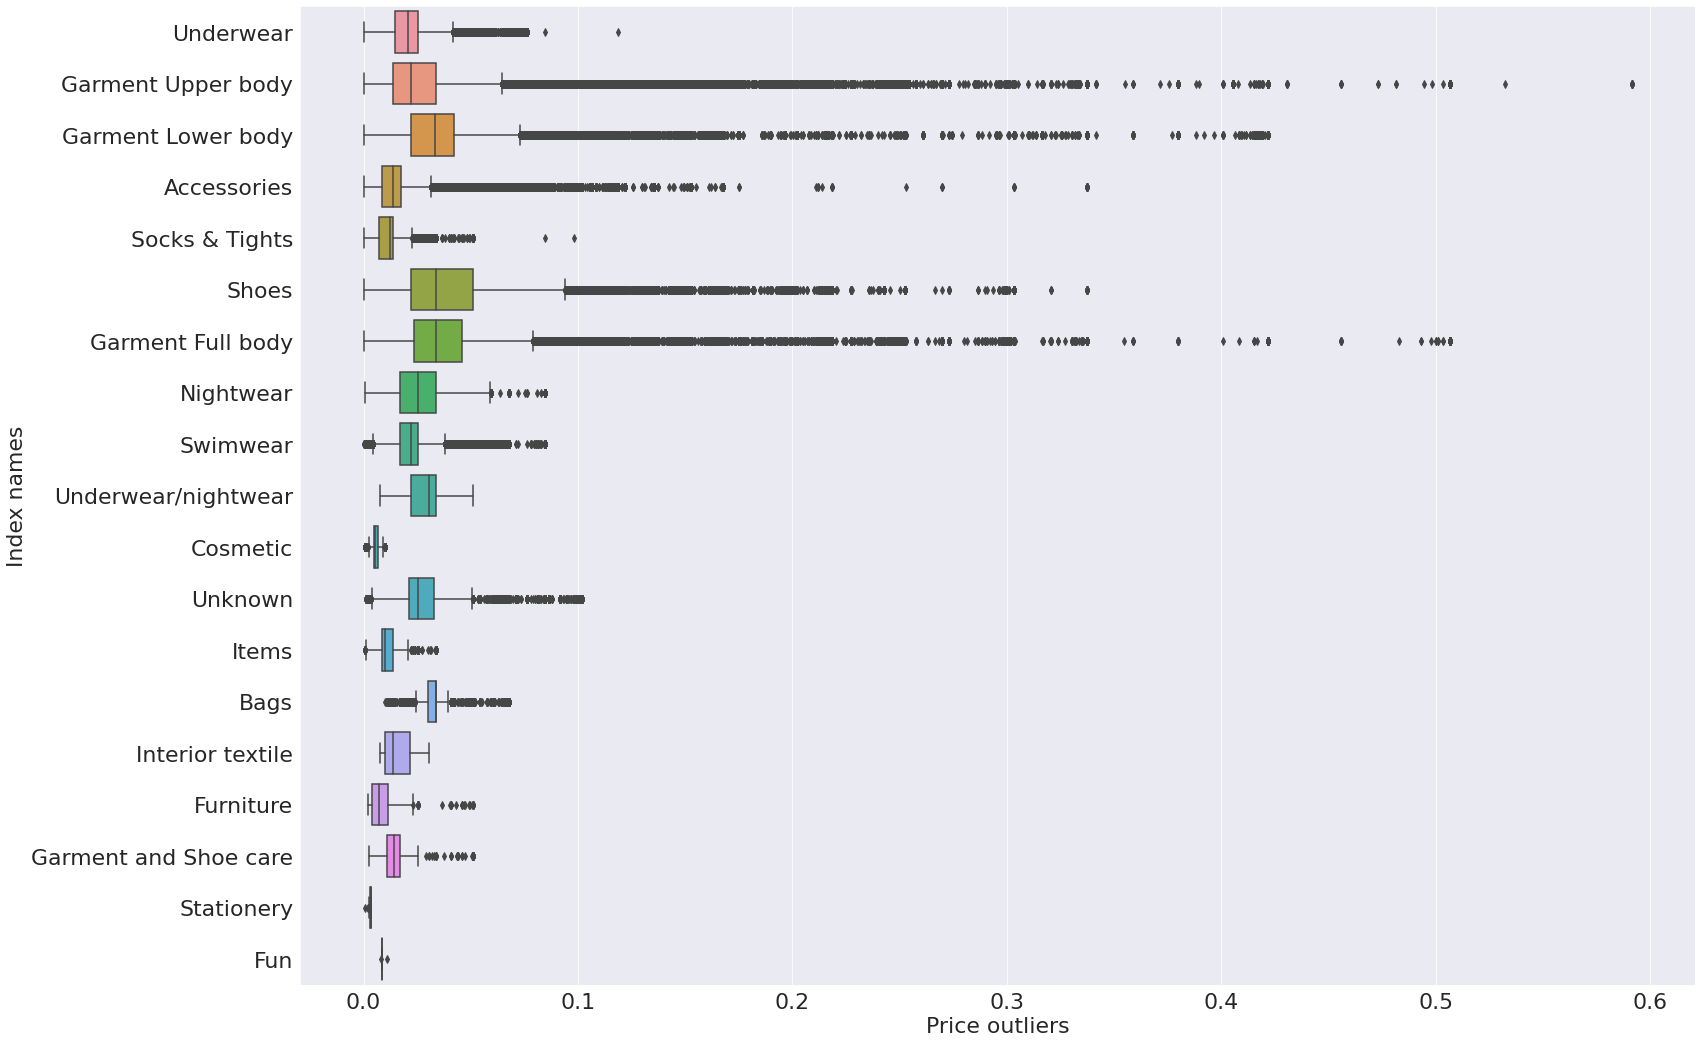

In [32]:
sns.set_style("darkgrid")
f, ax = plt.subplots(figsize=(25,18))
ax = sns.boxplot(data=articles_for_merge, x='price', y='product_group_name')
ax.set_xlabel('Price outliers', fontsize=22)
ax.set_ylabel('Index names', fontsize=22)
ax.xaxis.set_tick_params(labelsize=22)
ax.yaxis.set_tick_params(labelsize=22)

plt.show()

## boxplot prices according to accessories product group

Then look at boxplot prices according to accessories product group and find the reasons of high prices inside group.

The largest outliers can be found among bags, which is logical enough. In addition, scarves and other accessories have articles with prices highly contrasting to the rest of garments.

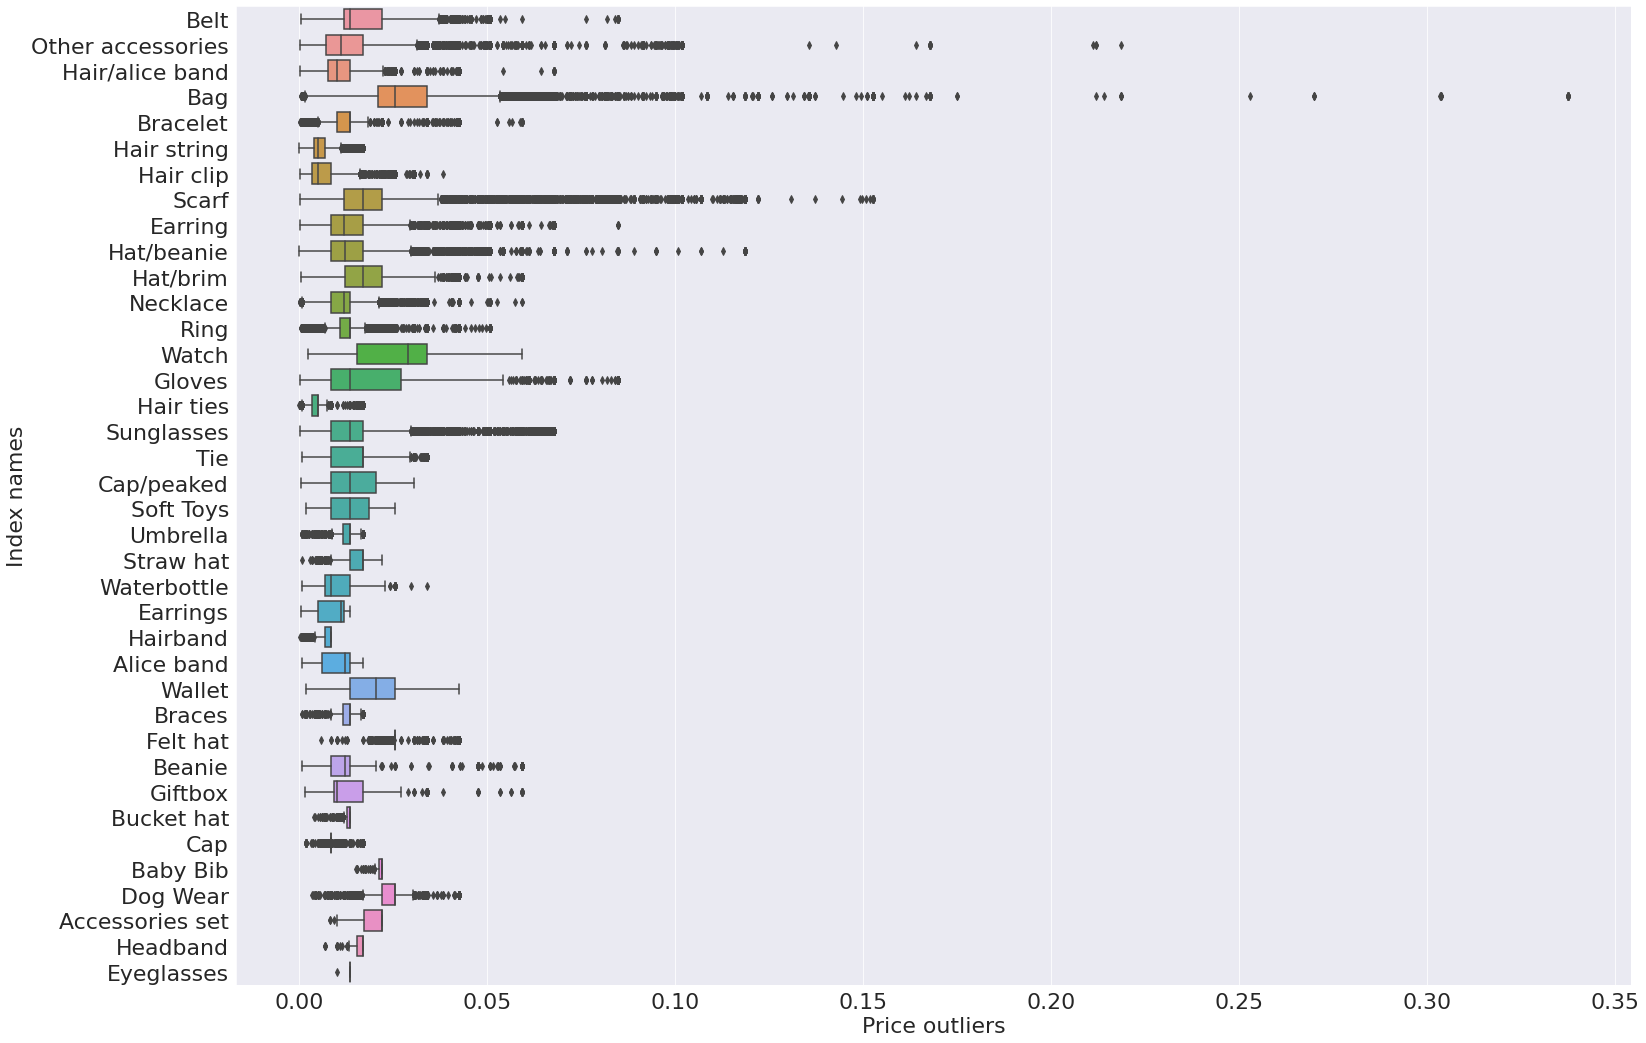

In [33]:
sns.set_style("darkgrid")
f, ax = plt.subplots(figsize=(25,18))
_ = articles_for_merge[articles_for_merge['product_group_name'] == 'Accessories']
ax = sns.boxplot(data=_, x='price', y='product_type_name')
ax.set_xlabel('Price outliers', fontsize=22)
ax.set_ylabel('Index names', fontsize=22)
ax.xaxis.set_tick_params(labelsize=22)
ax.yaxis.set_tick_params(labelsize=22)
del _

plt.show()

### price mean

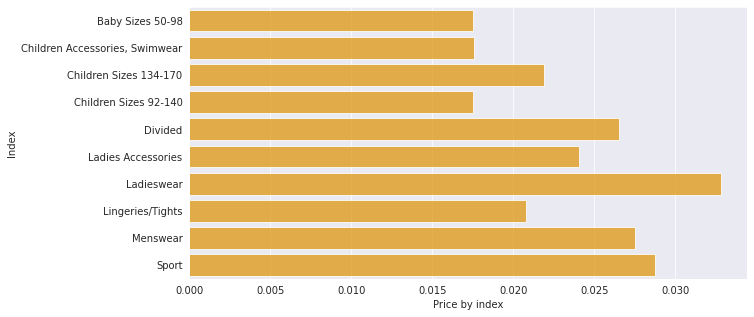

In [34]:
articles_index = articles_for_merge[['index_name', 'price']].groupby('index_name').mean()
sns.set_style("darkgrid")
f, ax = plt.subplots(figsize=(10,5))
ax = sns.barplot(x=articles_index.price, y=articles_index.index, color='orange', alpha=0.8)
ax.set_xlabel('Price by index')
ax.set_ylabel('Index')
plt.show()

## Price mean products

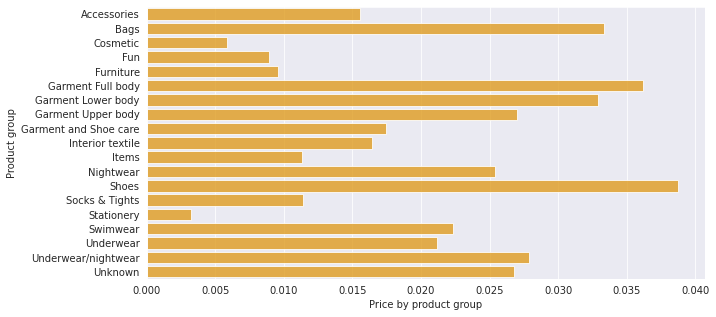

In [35]:
articles_index = articles_for_merge[['product_group_name', 'price']].groupby('product_group_name').mean()
sns.set_style("darkgrid")
f, ax = plt.subplots(figsize=(10,5))
ax = sns.barplot(x=articles_index.price, y=articles_index.index, color='orange', alpha=0.8)
ax.set_xlabel('Price by product group')
ax.set_ylabel('Product group')
plt.show()

Now check the mean price change in time for top 5 product groups by mean price:

* Shoes
* Garment Full body
* Bags
* Garment Lower body
* Underwear/nightwear

In [36]:
articles_for_merge['t_dat'] = pd.to_datetime(articles_for_merge['t_dat'])

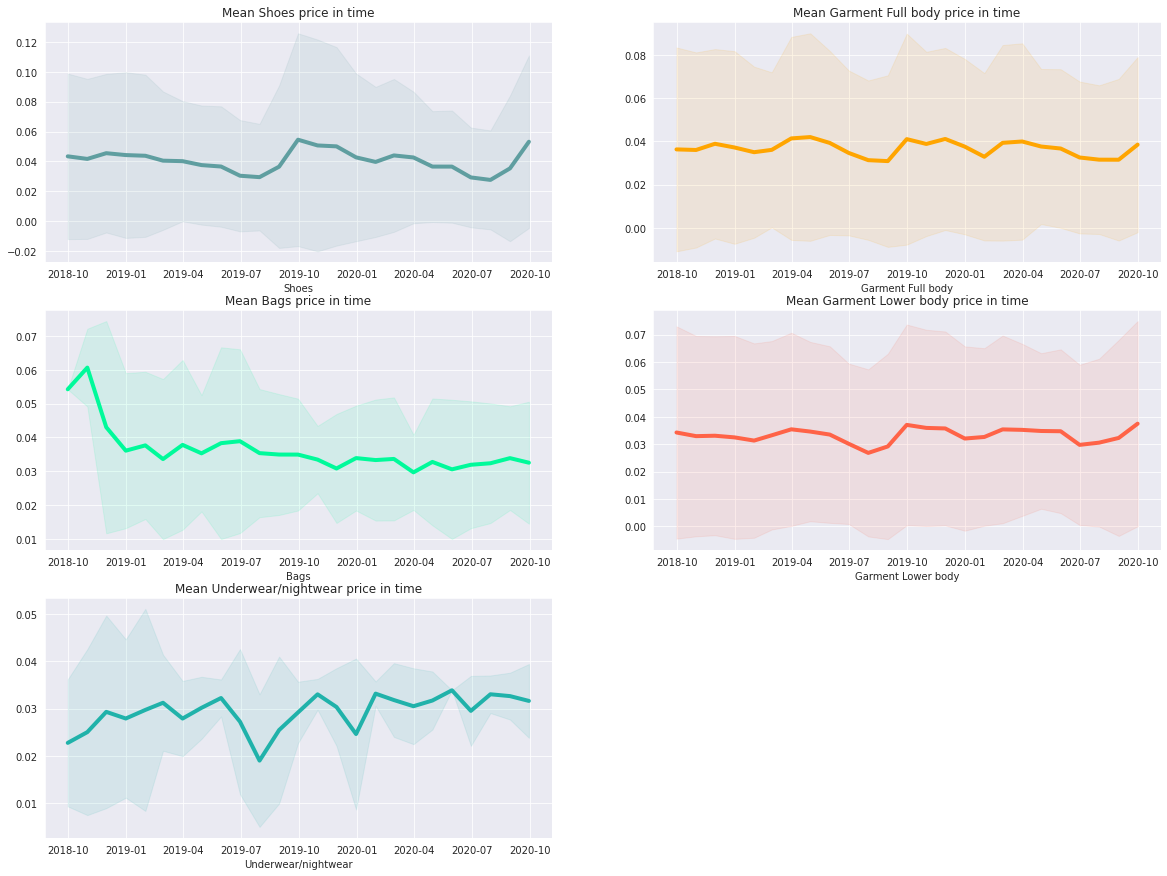

In [37]:
product_list = ['Shoes', 'Garment Full body', 'Bags', 'Garment Lower body', 'Underwear/nightwear']
colors = ['cadetblue', 'orange', 'mediumspringgreen', 'tomato', 'lightseagreen']
k = 0
f, ax = plt.subplots(3, 2, figsize=(20, 15))
for i in range(3):
    for j in range(2):
        try:
            product = product_list[k]
            articles_for_merge_product = articles_for_merge[articles_for_merge.product_group_name == product_list[k]]
            series_mean = articles_for_merge_product[['t_dat', 'price']].groupby(pd.Grouper(key="t_dat", freq='M')).mean().fillna(0)
            series_std = articles_for_merge_product[['t_dat', 'price']].groupby(pd.Grouper(key="t_dat", freq='M')).std().fillna(0)
            ax[i, j].plot(series_mean, linewidth=4, color=colors[k])
            ax[i, j].fill_between(series_mean.index, (series_mean.values-2*series_std.values).ravel(), 
                             (series_mean.values+2*series_std.values).ravel(), color=colors[k], alpha=.1)
            ax[i, j].set_title(f'Mean {product_list[k]} price in time')
            ax[i, j].set_xlabel('month')
            ax[i, j].set_xlabel(f'{product_list[k]}')
            k += 1
        except IndexError:
            ax[i, j].set_visible(False)
plt.show()

# Images with description and price

In [38]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [39]:
max_price_ids = transactions[transactions.t_dat==transactions.t_dat.max()].sort_values('price', ascending=False).iloc[:5][['article_id', 'price']]
min_price_ids = transactions[transactions.t_dat==transactions.t_dat.min()].sort_values('price', ascending=True).iloc[:5][['article_id', 'price']]

FileNotFoundError: [Errno 2] No such file or directory: '../input/h-and-m-personalized-fashion-recommendations/images/091/0916300001.jpg'

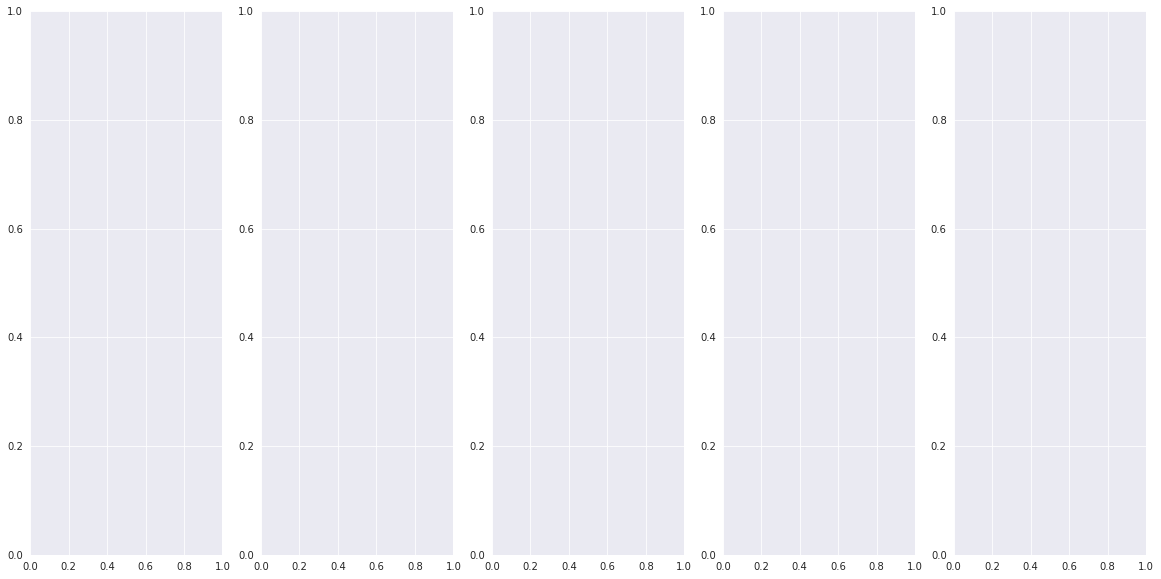

In [40]:
f, ax = plt.subplots(1, 5, figsize=(20,10))
i = 0
for _, data in max_price_ids.iterrows():
    desc = articles[articles['article_id'] == data['article_id']]['detail_desc'].iloc[0]
    desc_list = desc.split(' ')
    for j, elem in enumerate(desc_list):
        if j > 0 and j % 5 == 0:
            desc_list[j] = desc_list[j] + '\n'
    desc = ' '.join(desc_list)
    img = mpimg.imread(f'../input/h-and-m-personalized-fashion-recommendations/images/0{str(data.article_id)[:2]}/0{int(data.article_id)}.jpg')
    ax[i].imshow(img)
    ax[i].set_title(f'price: {data.price:.2f}')
    ax[i].set_xticks([], [])
    ax[i].set_yticks([], [])
    ax[i].grid(False)
    ax[i].set_xlabel(desc, fontsize=10)
    i += 1
plt.show()

## Photos with description and price (top 5 min)

In [ ]:
f, ax = plt.subplots(1, 5, figsize=(20,10))
i = 0
for _, data in min_price_ids.iterrows():
    desc = articles[articles['article_id'] == data['article_id']]['detail_desc'].iloc[0]
    desc_list = desc.split(' ')
    for j, elem in enumerate(desc_list):
        if j > 0 and j % 4 == 0:
            desc_list[j] = desc_list[j] + '\n'
    desc = ' '.join(desc_list)
    img = mpimg.imread(f'../input/h-and-m-personalized-fashion-recommendations/images/0{str(data.article_id)[:2]}/0{int(data.article_id)}.jpg')
    ax[i].imshow(img)
    ax[i].set_title(f'price: {data.price:.4f}')
    ax[i].set_xlabel(desc, fontsize=10)
    ax[i].set_xticks([], [])
    ax[i].set_yticks([], [])
    ax[i].grid(False)
    i += 1
plt.axis('off')
plt.show()

## セグメント毎のEDA

* 知りたいこと
    - 異性の服を買う人はいるのか
    - 年齢や性別に応じてどれくらい買うもののジャンルの分布が異なるのか
    - 住む地域による購入品の違い
    - 季節性
        - その季節にこの客に買われやすいとか